## Credit Card Fraud Detection

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Inspiration
Identify fraudulent credit card transactions.


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
import pickle
LABELS = ["Normal", "Fraud"]

In [2]:
data = pd.read_csv("C:/Users/LENOVO/Downloads/credit_card_fraud_detection-main/credit_card_fraud_detection-main/creditcard.csv",header=0)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
data.shape

(284807, 31)

In [6]:
print("Number of columns: {}".format(data.shape[1]))
print("Number of rows: {}".format(data.shape[0]))

Number of columns: 31
Number of rows: 284807


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
data.duplicated().any()

True

In [15]:
data = data.drop_duplicates()

In [16]:
data.shape

(283726, 31)

In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [18]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

## Visualization

<Axes: xlabel='Amount'>

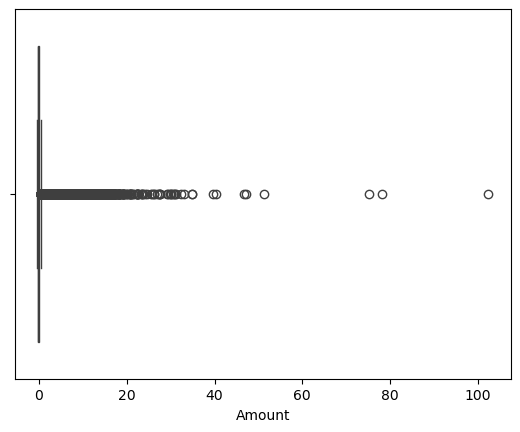

In [19]:
import seaborn as sns
sns.boxplot(x="Amount",data=data)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9100\2812369284.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


Text(0, 0.5, 'Frequency')

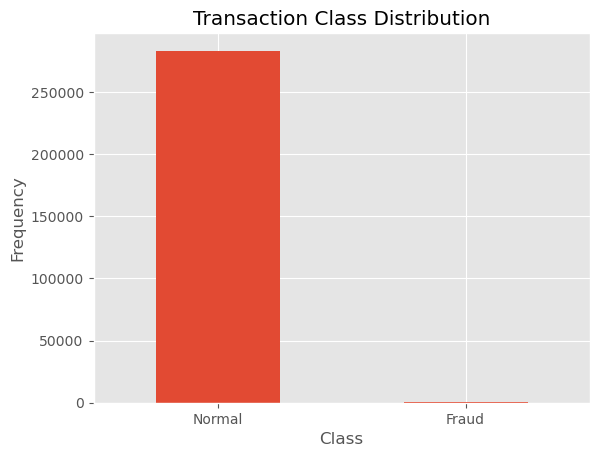

In [21]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [22]:
## Get the Fraud and the normal dataset 
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [23]:
print(fraud.shape,normal.shape)

(473, 31) (283253, 31)


In [24]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count    473.000000
mean       0.142021
std        1.040346
min       -0.353229
25%       -0.349231
50%       -0.313968
75%        0.070128
max        8.146182
Name: Amount, dtype: float64

In [25]:
normal.Amount.describe()

count    283253.000000
mean          0.000256
std           1.001037
min          -0.353229
25%          -0.330560
50%          -0.265271
75%          -0.043538
max         102.362243
Name: Amount, dtype: float64

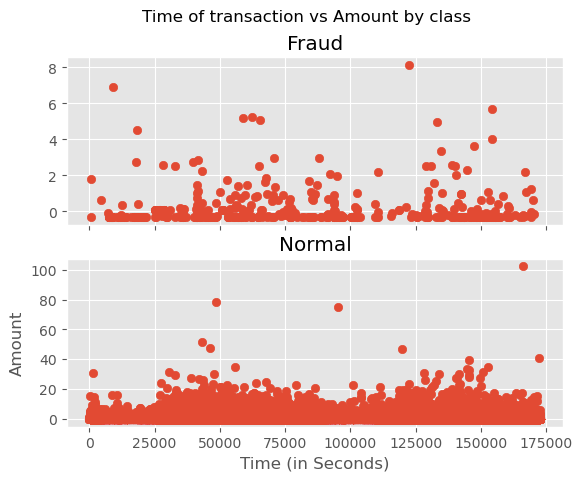

In [26]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [27]:
## Take some sample of the data
data1= data.sample(frac = 0.1,random_state=42)
data1.shape

(28373, 31)

In [28]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [29]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0014824750273551939
Fraud Cases : 42
Valid Cases : 28331


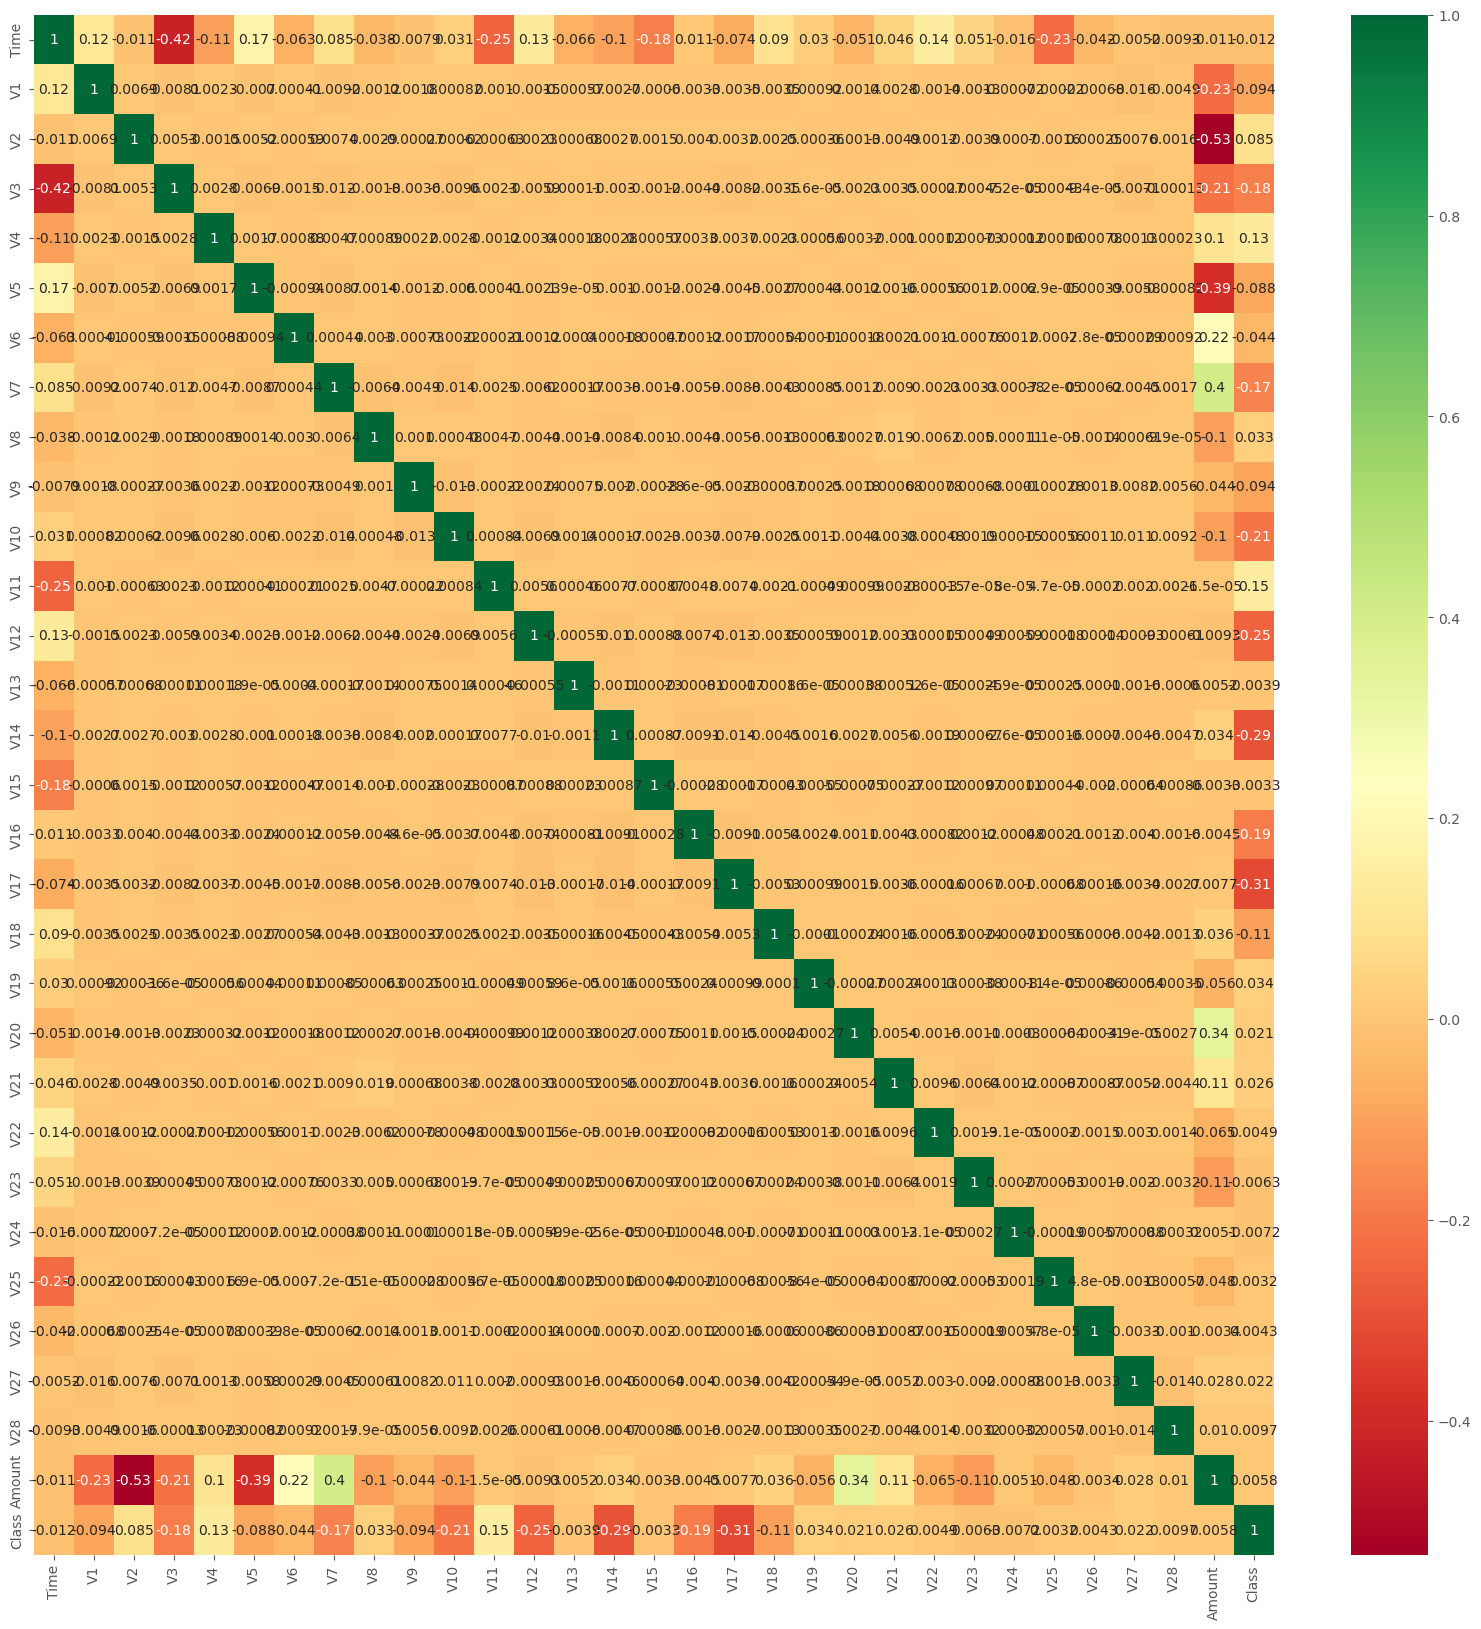

In [30]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Models Interpretation

In [31]:
data = data.drop(['Time'], axis =1)

In [32]:
data.shape

(283726, 30)

In [33]:
X = data.drop('Class', axis = 1)
y=data['Class']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


==========Logistic Regression===========

 Accuracy: 0.9991893701758714

 Confusion matrix: 
 [[56650     6]
 [   40    50]]

 Precision: 0.8928571428571429

 Recall: 0.5555555555555556

 F1 Score: 0.684931506849315

==========Decision Tree Classifier===========

 Accuracy: 0.9991717477883904

 Confusion matrix: 
 [[56632    24]
 [   23    67]]

 Precision: 0.7362637362637363

 Recall: 0.7444444444444445

 F1 Score: 0.7403314917127072


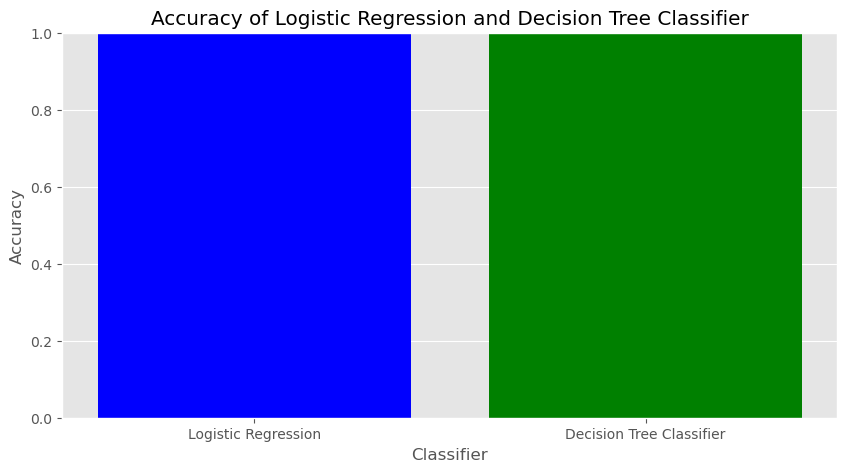

In [37]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}
accuracies = {}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    
    print(f"\n Accuracy: {accuracy}")
    print(f"\n Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")

# Create bar chart
names = list(accuracies.keys())
values = list(accuracies.values())

plt.figure(figsize=(10, 5))
plt.bar(names, values, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression and Decision Tree Classifier')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
plt.show()

### Undersampling

In [38]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [39]:
normal.shape

(283253, 30)

In [40]:
fraud.shape

(473, 30)

In [41]:
normal_sample = normal.sample(n=473)

In [42]:
normal_sample.shape

(473, 30)

In [43]:
new_data = pd.concat([normal_sample,fraud], ignore_index=True)

In [44]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.989331,-0.836049,0.837044,-1.243429,-0.920441,-0.795300,1.315694,-0.247193,-1.313142,-0.234154,...,-0.165499,-0.558551,0.573141,0.376420,-0.043423,0.906282,-0.087556,0.130928,0.804297,0
1,2.059554,-0.041296,-1.090043,0.389610,-0.055371,-1.083023,0.184819,-0.318647,0.507216,0.057837,...,-0.285463,-0.667797,0.335689,-0.077000,-0.295441,0.204651,-0.065930,-0.060765,-0.348072,0
2,1.021538,-0.722876,2.167144,0.996961,-1.875991,0.282201,-1.348608,0.188065,3.229945,-0.991120,...,-0.061887,0.512518,-0.095070,0.809069,0.227212,1.186301,-0.011386,0.027512,-0.120141,0
3,1.985697,-1.249794,-0.783623,-1.270199,-0.401368,1.090395,-1.311425,0.498463,-0.126068,0.842598,...,0.118030,0.221837,0.371648,-1.698155,-0.747757,-0.365668,0.038601,-0.063894,-0.193306,0
4,1.430032,-1.781689,1.121330,-1.063655,-1.906736,1.117046,-2.034302,0.341396,-0.029876,1.002464,...,-0.322472,-0.123353,-0.226174,-0.974706,0.565108,0.056806,0.107757,0.023991,-0.173515,0


In [45]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [46]:
X = new_data.drop('Class', axis = 1)
y= new_data['Class']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


==========Logistic Regression===========

 Accuracy: 0.9263157894736842

 Confusion Matrix: 
 [[83  5]
 [ 9 93]]

 Precision: 0.9489795918367347

 Recall: 0.9117647058823529

 F1 Score: 0.93

==========Decision Tree Classifier===========

 Accuracy: 0.9210526315789473

 Confusion Matrix: 
 [[84  4]
 [11 91]]

 Precision: 0.9578947368421052

 Recall: 0.8921568627450981

 F1 Score: 0.9238578680203046


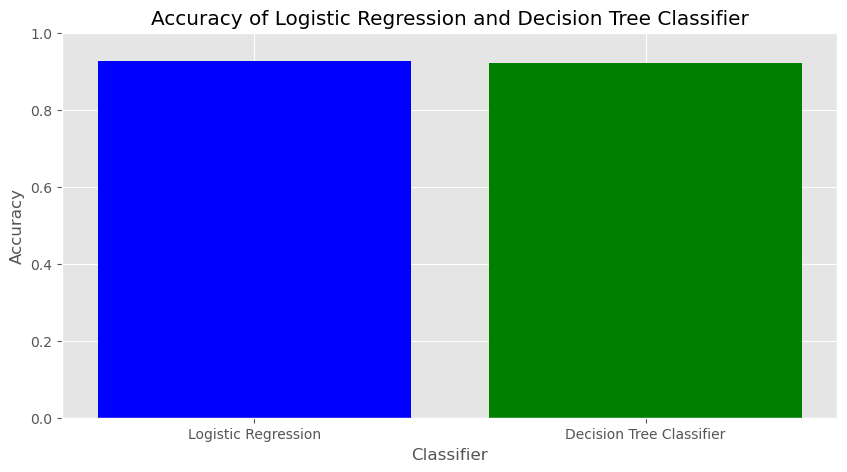

In [48]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

# Dictionary to store the accuracies
accuracies = {}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    
    print(f"\n Accuracy: {accuracy}")
    print(f"\n Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")

# Create bar chart
names = list(accuracies.keys())
values = list(accuracies.values())

plt.figure(figsize=(10, 5))
plt.bar(names, values, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression and Decision Tree Classifier')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
plt.show()


## OVERSAMPLING

In [49]:
X = data.drop('Class', axis = 1)
y= data['Class']

In [50]:
X.shape

(283726, 29)

In [51]:
y.shape

(283726,)

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
X_res, y_res = SMOTE().fit_resample(X,y)
feature_names = X.columns.tolist()
X_res_df = pd.DataFrame(X_res, columns=feature_names)

In [54]:
y_res.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_res_df, y_res, test_size = 0.2,stratify=y_res, random_state = 42)


==========Logistic Regression===========

 Accuracy: 0.9439639194365501

 Confusion Matrix: 
 [[55158  1493]
 [ 4856 51795]]

 Precision: 0.9719824350698093

 Recall: 0.9142821838979012

 F1 Score: 0.9422497930670645

==========Decision Tree Classifier===========

 Accuracy: 0.9983848475755062

 Confusion Matrix: 
 [[56518   133]
 [   50 56601]]

 Precision: 0.9976557267247154

 Recall: 0.9991174030467247

 F1 Score: 0.9983860298981346


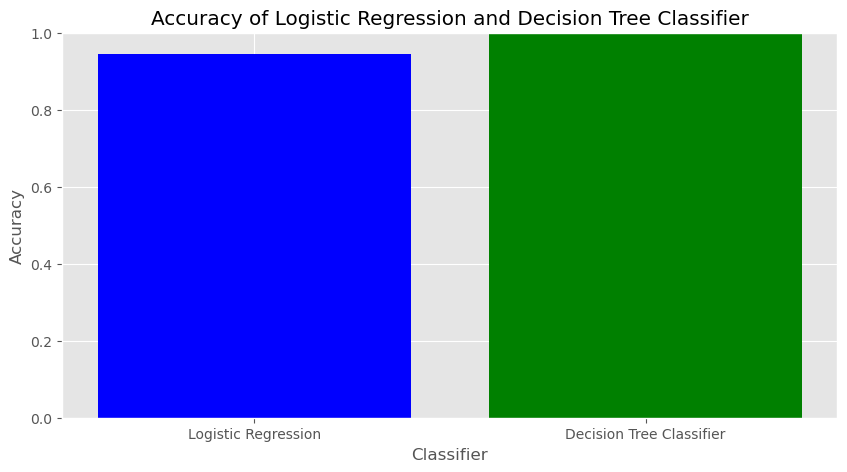

In [56]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

# Dictionary to store the accuracies
accuracies = {}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    
    print(f"\n Accuracy: {accuracy}")
    print(f"\n Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")

# Create bar chart
names = list(accuracies.keys())
values = list(accuracies.values())

plt.figure(figsize=(10, 5))
plt.bar(names, values, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression and Decision Tree Classifier')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
plt.show()


## Creating Pickle File

In [57]:
dtc = DecisionTreeClassifier()
dtc.fit(X_res_df, y_res)

DecisionTreeClassifier()

In [58]:
with open("credit_card_model.pkl",'wb') as f:
    pickle.dump(dtc,f)

In [59]:
dtc_model=pickle.load(open("credit_card_model.pkl",'rb'))

In [60]:
pred=dtc_model.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,
                         0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,
                         -0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,
                         0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,
                         0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]])

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [61]:
if pred[0] == 0:
    print("Normal Transcation")
else:
    print("Fraud Transcation")

Normal Transcation


In [62]:
pred2=dtc_model.predict([[0.7027099,2.426432806,-5.234513296,4.416661243,-2.170806216,
                        -2.667553561,-3.878088455,0.911337122,-0.166199039,-5.009248502,
                        4.675729419,-8.167188052,0.638559282,-6.763334391,1.296860256,
                        -3.81175841,-3.754128066,-1.049177402,1.554197263,0.422743129,
                        0.551179689,-0.009802357,0.72169823,0.473245751,-1.959303771,
                        0.31947554,0.600484916,0.1293052251,1
]])

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [63]:
if pred2[0] == 0:
    print("Normal Transcation")
else:
    print("Fraud Transcation")

Fraud Transcation
